#                        Bike Sharing Demand               -AYŞE DUMAN


Bisiklet paylaşım sistemleri, üyelik alma, kiralama ve bisiklet iadesi sürecinin bir şehirdeki kiosk konumları ağı aracılığıyla otomatikleştirildiği bir bisiklet kiralama yöntemidir. Bu sistemleri kullanarak, insanlar tek bir yerden bisiklet kiralayabilir ve ihtiyaç duydukça farklı bir yere iade edebilir. Şu anda dünya çapında 500'den fazla bisiklet paylaşım programı var.

Bu sistemler tarafından üretilen veriler, onları araştırmacılar için çekici kılar çünkü seyahat süresi, hareket yeri, varış yeri ve geçen zaman açıkça kaydedilmiştir. Bisiklet paylaşım sistemleri bu nedenle bir şehirde hareketliliği incelemek için kullanılabilecek bir sensör ağı olarak işlev görüR.

#### About Data Description:

Data Fields
datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np
import math 
import warnings
warnings.filterwarnings('ignore')

# 1) Reading the csv File

In [4]:
PATH = "data/bike_sharing_demand/"

In [5]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False, 
                     parse_dates=["count"])


In [6]:
df_raw.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


type of variables :

1.Categorical: season - holiday - workingday - weather

2.TimeSeries: datetime

3.Numerical:temp - atemp -humidty - windspeed - casual - registered - count

In [7]:
df_raw.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
df_raw.dtypes # Görüldüğü gibi veri setinde datetime ve count featurelarının veri tipi object olup
              #bunların ilerki aşamalarda dönüştürülmesi beklenir.

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count          object
dtype: object

In [9]:
df_raw.shape  # 10886 örneklem ve 12 sütunluk bir veri setimiz mevcut

(10886, 12)

In [10]:
# datetime sütundaki bilgilerden yararlanabilmek için tipini datetime formatına getirelim
df_raw.datetime = pd.to_datetime(df_raw.datetime)


In [11]:
df_raw.dtypes # count(target) kolonunu  Root Mean Squared Logarithmic Error (RMSLE) hesabı yapılmadan önce ele alınacaktır.



datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                 object
dtype: object

In [12]:
df_raw.drop(['casual','registered'],axis=1,inplace=True) # casual + registered = count olduğundan silinebilir

In [13]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [14]:
display_all(df_raw.tail(20))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
10866,2012-12-19 04:00:00,4,0,1,1,9.84,12.120,75,8.9981,7
10867,2012-12-19 05:00:00,4,0,1,1,10.66,14.395,75,6.0032,31
10868,2012-12-19 06:00:00,4,0,1,1,9.84,12.880,75,6.0032,112
10869,2012-12-19 07:00:00,4,0,1,1,10.66,13.635,75,8.9981,363
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,678
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,317
10872,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,164
10873,2012-12-19 11:00:00,4,0,1,1,16.40,20.455,54,15.0013,200
10874,2012-12-19 12:00:00,4,0,1,1,16.40,20.455,54,19.0012,236
10875,2012-12-19 13:00:00,4,0,1,1,17.22,21.210,50,12.9980,213


Root Mean Squared Logarithmic Error (RMSLE) hesabı aşağıda belirtilmiştir.

$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2} $


İlk olarak target değer olan count öz niteliğine log dönüşümü uygulayalım

In [15]:
df_raw["count"] =  df_raw["count"].astype("float") # veri tipini objectten floata dönüştürelim.


In [16]:
df_raw["count"]  = np.log1p(df_raw["count"]) # count değeri 0 olan verilerde log alma işlemi hatalı olduğu için her veriye 1 ekleme
                                    #yaparak yani log1p() fonksiyonundan faydalanarak hedef sütundaki her değere log dönüşümü uygulayalım


In [17]:
df_raw["count"][:20] # log dönüşümü sonucu target değerlerden ilk 20 değeri bastıralım 

0     2.833213
1     3.713572
2     3.496508
3     2.639057
4     0.693147
5     0.693147
6     1.098612
7     1.386294
8     2.197225
9     2.708050
10    3.610918
11    4.043051
12    4.442651
13    4.553877
14    4.672829
15    4.709530
16    4.543295
17    4.219508
18    3.583519
19    3.637586
Name: count, dtype: float64

# 2) Pre-processing

## Feature Engineering

In [18]:
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [19]:
df_compare = df_raw.copy()

In [20]:
df_compare.drop("datetime", axis=1, inplace=True) # sonraki aşamalarda karşılaştırma yapmak için verinin kendisine ait 
                                                  # başlangıç kolonlarını df_compare de tutalım.

Weather öz niteliği 1,2,3,4 değeriyle başlangıç veri setinde bulunmaktadır.

(weather - 1: Clear, Few clouds, Partly cloudy,Partly cloudy2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog )

Hangi durumun target değerine daha çok katkı sağladığını
anlayabilmek için bu 4 farklı durumu pd.get_dummies() kullanarak ek öznitelik olarak ekleyelim.

In [21]:
weather=pd.get_dummies(df_raw['weather'],prefix='weather')
df_raw=pd.concat([df_raw,weather],axis=1)
df_raw.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,2.833213,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,3.713572,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,3.496508,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,2.639057,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.693147,1,0,0,0


Aynı düşüncemizi season sütununda tekrar uygulayalım
(season - 1 = spring, 2 = summer, 3 = fall, 4 = winter)

In [22]:
# her bir sezon değeri için ayrı bir feature oluşturalım. Bunun nedeni özellikleri geliştirecek olmasıdır.
season=pd.get_dummies(df_raw['season'],prefix='season')
df_raw=pd.concat([df_raw,season],axis=1)
df_raw.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,2.833213,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,3.713572,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,3.496508,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,2.639057,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.693147,1,0,0,0,1,0,0,0


In [23]:
#dt_name is the name of the column that is of type datepart
def add_datepart(df, dt_name, drop=True, time=True):
    "Creates new columns from our datetime column"
    
    
    dt_column = df[dt_name]
    column_dtype = dt_column.dtype
    

    targ_name = re.sub('[Dd]ate$', '', dt_name)
    
    
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    
    if time: 
        attr = attr + ['Hour'] # verilen datada sadece saat dataları var olduğundan dakika ve saniye bilgilerini bilmiyoruz
                                                  
        
    
    
    for a in attr: 
        df[targ_name + a] = getattr(dt_column.dt, a.lower())
        
    # ne kadar zaman geçtiğini hesaplama için 1 sütun daha oluşturulalım
    df[targ_name + 'Elapsed'] = dt_column.astype(np.int64) // 10 ** 9
    
    if drop: 
        df.drop(dt_name, axis=1, inplace=True)

In [24]:
add_datepart(df_raw, "datetime")

In [25]:
display_all(df_raw.head())

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4,datetimeYear,datetimeMonth,datetimeWeek,datetimeDay,datetimeDayofweek,datetimeDayofyear,datetimeIs_month_end,datetimeIs_month_start,datetimeIs_quarter_end,datetimeIs_quarter_start,datetimeIs_year_end,datetimeIs_year_start,datetimeHour,datetimeElapsed
0,1,0,0,1,9.84,14.395,81,0.0,2.833213,1,0,0,0,1,0,0,0,2011,1,52,1,5,1,False,True,False,True,False,True,0,1293840000
1,1,0,0,1,9.02,13.635,80,0.0,3.713572,1,0,0,0,1,0,0,0,2011,1,52,1,5,1,False,True,False,True,False,True,1,1293843600
2,1,0,0,1,9.02,13.635,80,0.0,3.496508,1,0,0,0,1,0,0,0,2011,1,52,1,5,1,False,True,False,True,False,True,2,1293847200
3,1,0,0,1,9.84,14.395,75,0.0,2.639057,1,0,0,0,1,0,0,0,2011,1,52,1,5,1,False,True,False,True,False,True,3,1293850800
4,1,0,0,1,9.84,14.395,75,0.0,0.693147,1,0,0,0,1,0,0,0,2011,1,52,1,5,1,False,True,False,True,False,True,4,1293854400


# Handling Missing Values

In [26]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw)) # Veri setimizde kayıp değer var olup olmadığını kontrol edelim.

atemp                       0.0
count                       0.0
datetimeDay                 0.0
datetimeDayofweek           0.0
datetimeDayofyear           0.0
datetimeElapsed             0.0
datetimeHour                0.0
datetimeIs_month_end        0.0
datetimeIs_month_start      0.0
datetimeIs_quarter_end      0.0
datetimeIs_quarter_start    0.0
datetimeIs_year_end         0.0
datetimeIs_year_start       0.0
datetimeMonth               0.0
datetimeWeek                0.0
datetimeYear                0.0
holiday                     0.0
humidity                    0.0
season                      0.0
season_1                    0.0
season_2                    0.0
season_3                    0.0
season_4                    0.0
temp                        0.0
weather                     0.0
weather_1                   0.0
weather_2                   0.0
weather_3                   0.0
weather_4                   0.0
windspeed                   0.0
workingday                  0.0
dtype: f

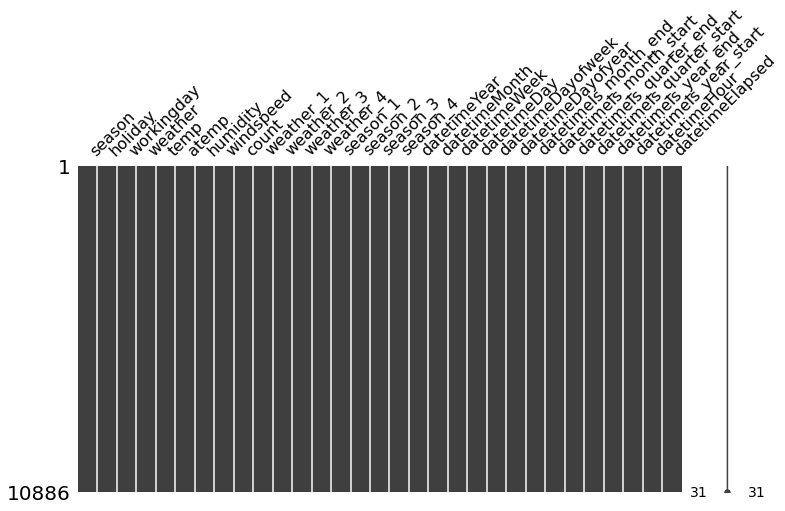

In [27]:
import missingno as msno

msno.matrix(df_raw,figsize=(12,6)) # kayıp değer olmadığını görselleştirelim


In [28]:
df_compare.columns # ilk veri setimizin kolonları

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count'],
      dtype='object')

In [29]:
df_raw.columns # yeni featurelar oluşturulduktan sonra

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'season_1', 'season_2', 'season_3', 'season_4',
       'datetimeYear', 'datetimeMonth', 'datetimeWeek', 'datetimeDay',
       'datetimeDayofweek', 'datetimeDayofyear', 'datetimeIs_month_end',
       'datetimeIs_month_start', 'datetimeIs_quarter_end',
       'datetimeIs_quarter_start', 'datetimeIs_year_end',
       'datetimeIs_year_start', 'datetimeHour', 'datetimeElapsed'],
      dtype='object')

In [30]:
# target ve diğer featureları döndürelim.

def proc_df(df, target):
    
    y = df[target].values
    df.drop([target], axis = 1, inplace = True)
        
    res = [df, y]
    
  
    return res

In [31]:
df_compare, y_compare = proc_df(df_compare, 'count')

In [32]:
df, y = proc_df(df_raw, 'count')

In [33]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,weather_1,weather_2,...,datetimeDayofweek,datetimeDayofyear,datetimeIs_month_end,datetimeIs_month_start,datetimeIs_quarter_end,datetimeIs_quarter_start,datetimeIs_year_end,datetimeIs_year_start,datetimeHour,datetimeElapsed
0,1,0,0,1,9.84,14.395,81,0.0,1,0,...,5,1,False,True,False,True,False,True,0,1293840000
1,1,0,0,1,9.02,13.635,80,0.0,1,0,...,5,1,False,True,False,True,False,True,1,1293843600
2,1,0,0,1,9.02,13.635,80,0.0,1,0,...,5,1,False,True,False,True,False,True,2,1293847200
3,1,0,0,1,9.84,14.395,75,0.0,1,0,...,5,1,False,True,False,True,False,True,3,1293850800
4,1,0,0,1,9.84,14.395,75,0.0,1,0,...,5,1,False,True,False,True,False,True,4,1293854400


In [34]:
y[:10]

array([2.83321334, 3.71357207, 3.49650756, 2.63905733, 0.69314718,
       0.69314718, 1.09861229, 1.38629436, 2.19722458, 2.7080502 ])

## 3) Creating Random Forest 

### Base model

Modelimizi oluşturup skora göre verilerimizi tekrar ele alacağız.

In [35]:
# Validasyon setimizi oluşturalım
# It will split our data set to have length n train and len(df) - n validation set
def split_train_val(df,n): 
    
    return df[:n].copy(), df[n:].copy()

In [36]:
n_valid = int(len(df)/10)  # veri sayımız az olduğundan 1/10 u kadar val sete veri girişi yaptık
n_train = len(df)-n_valid
X_train, X_valid = split_train_val(df, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((9798, 30), (9798,), (1088, 30), (1088,))

In [37]:
# kullanacağımız metrik formülü

def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

In [38]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(X_valid), y_valid)}")
    print(f"R^2 of train set {m.score(X_train, y_train)}")
    print(f"R^2 of validation set {m.score(X_valid, y_valid)}")

In [39]:
# modeli oluşturalım
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 1.48 s
RMSE of train set 0.10919450533208168
RMSE of validation set 0.3331505669829512
R^2 of train set 0.9941089432788224
R^2 of validation set 0.9395896128772311


# Trying Different Things Fast


Bazı veri setleri fazla büyük ve işlenmesi zaman aldığı için alt bir küme ile işlem yapmak model oluşturma ve çabuk bir şekilde 
modeli iyileştirme konusunda bize yardımcı olacaktır.

In [40]:
# veri setimizden büyüklüğünü kendimiz bir örneklem kümesi alalım:
def get_sample(df,n):

    idxs = np.random.permutation(len(df))[:n]
    return idxs, df.iloc[idxs].copy()

In [41]:
idxs, X_train = get_sample(X_train, 1000)
y_train = y_train[idxs]

In [42]:
y_train.shape

(1000,)

In [43]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 250 ms
RMSE of train set 0.15809177784969505
RMSE of validation set 0.4227826546889759
R^2 of train set 0.9877119727888489
R^2 of validation set 0.9027107561151668


Veri setimiz çok büyük boyutlu olmadığı için analizleri tüm datayı kullanarak yapabiliriz.

# Single tree

In [44]:
n_valid = int(len(df)/10)  # veri sayımız az olduğundan 1/10 u kadar val sete veri girişi yaptık
n_train = len(df)-n_valid
X_train, X_valid = split_train_val(df, n_train)
y_train, y_valid = split_train_val(y, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((9798, 30), (9798,), (1088, 30), (1088,))

In [45]:
m = RandomForestRegressor(n_estimators=1, max_depth=10, bootstrap=False, n_jobs=-1)
t = m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.30891368106659667
RMSE of validation set 0.4535624488074042
R^2 of train set 0.9528517129349456
R^2 of validation set 0.8880292239700167


# Plotting a Tree

In [46]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
t = m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.7376132644675455
RMSE of validation set 0.6623498649588996
R^2 of train set 0.7311877414011859
R^2 of validation set 0.7612158974420653


In [47]:
estimator = m.estimators_[0]

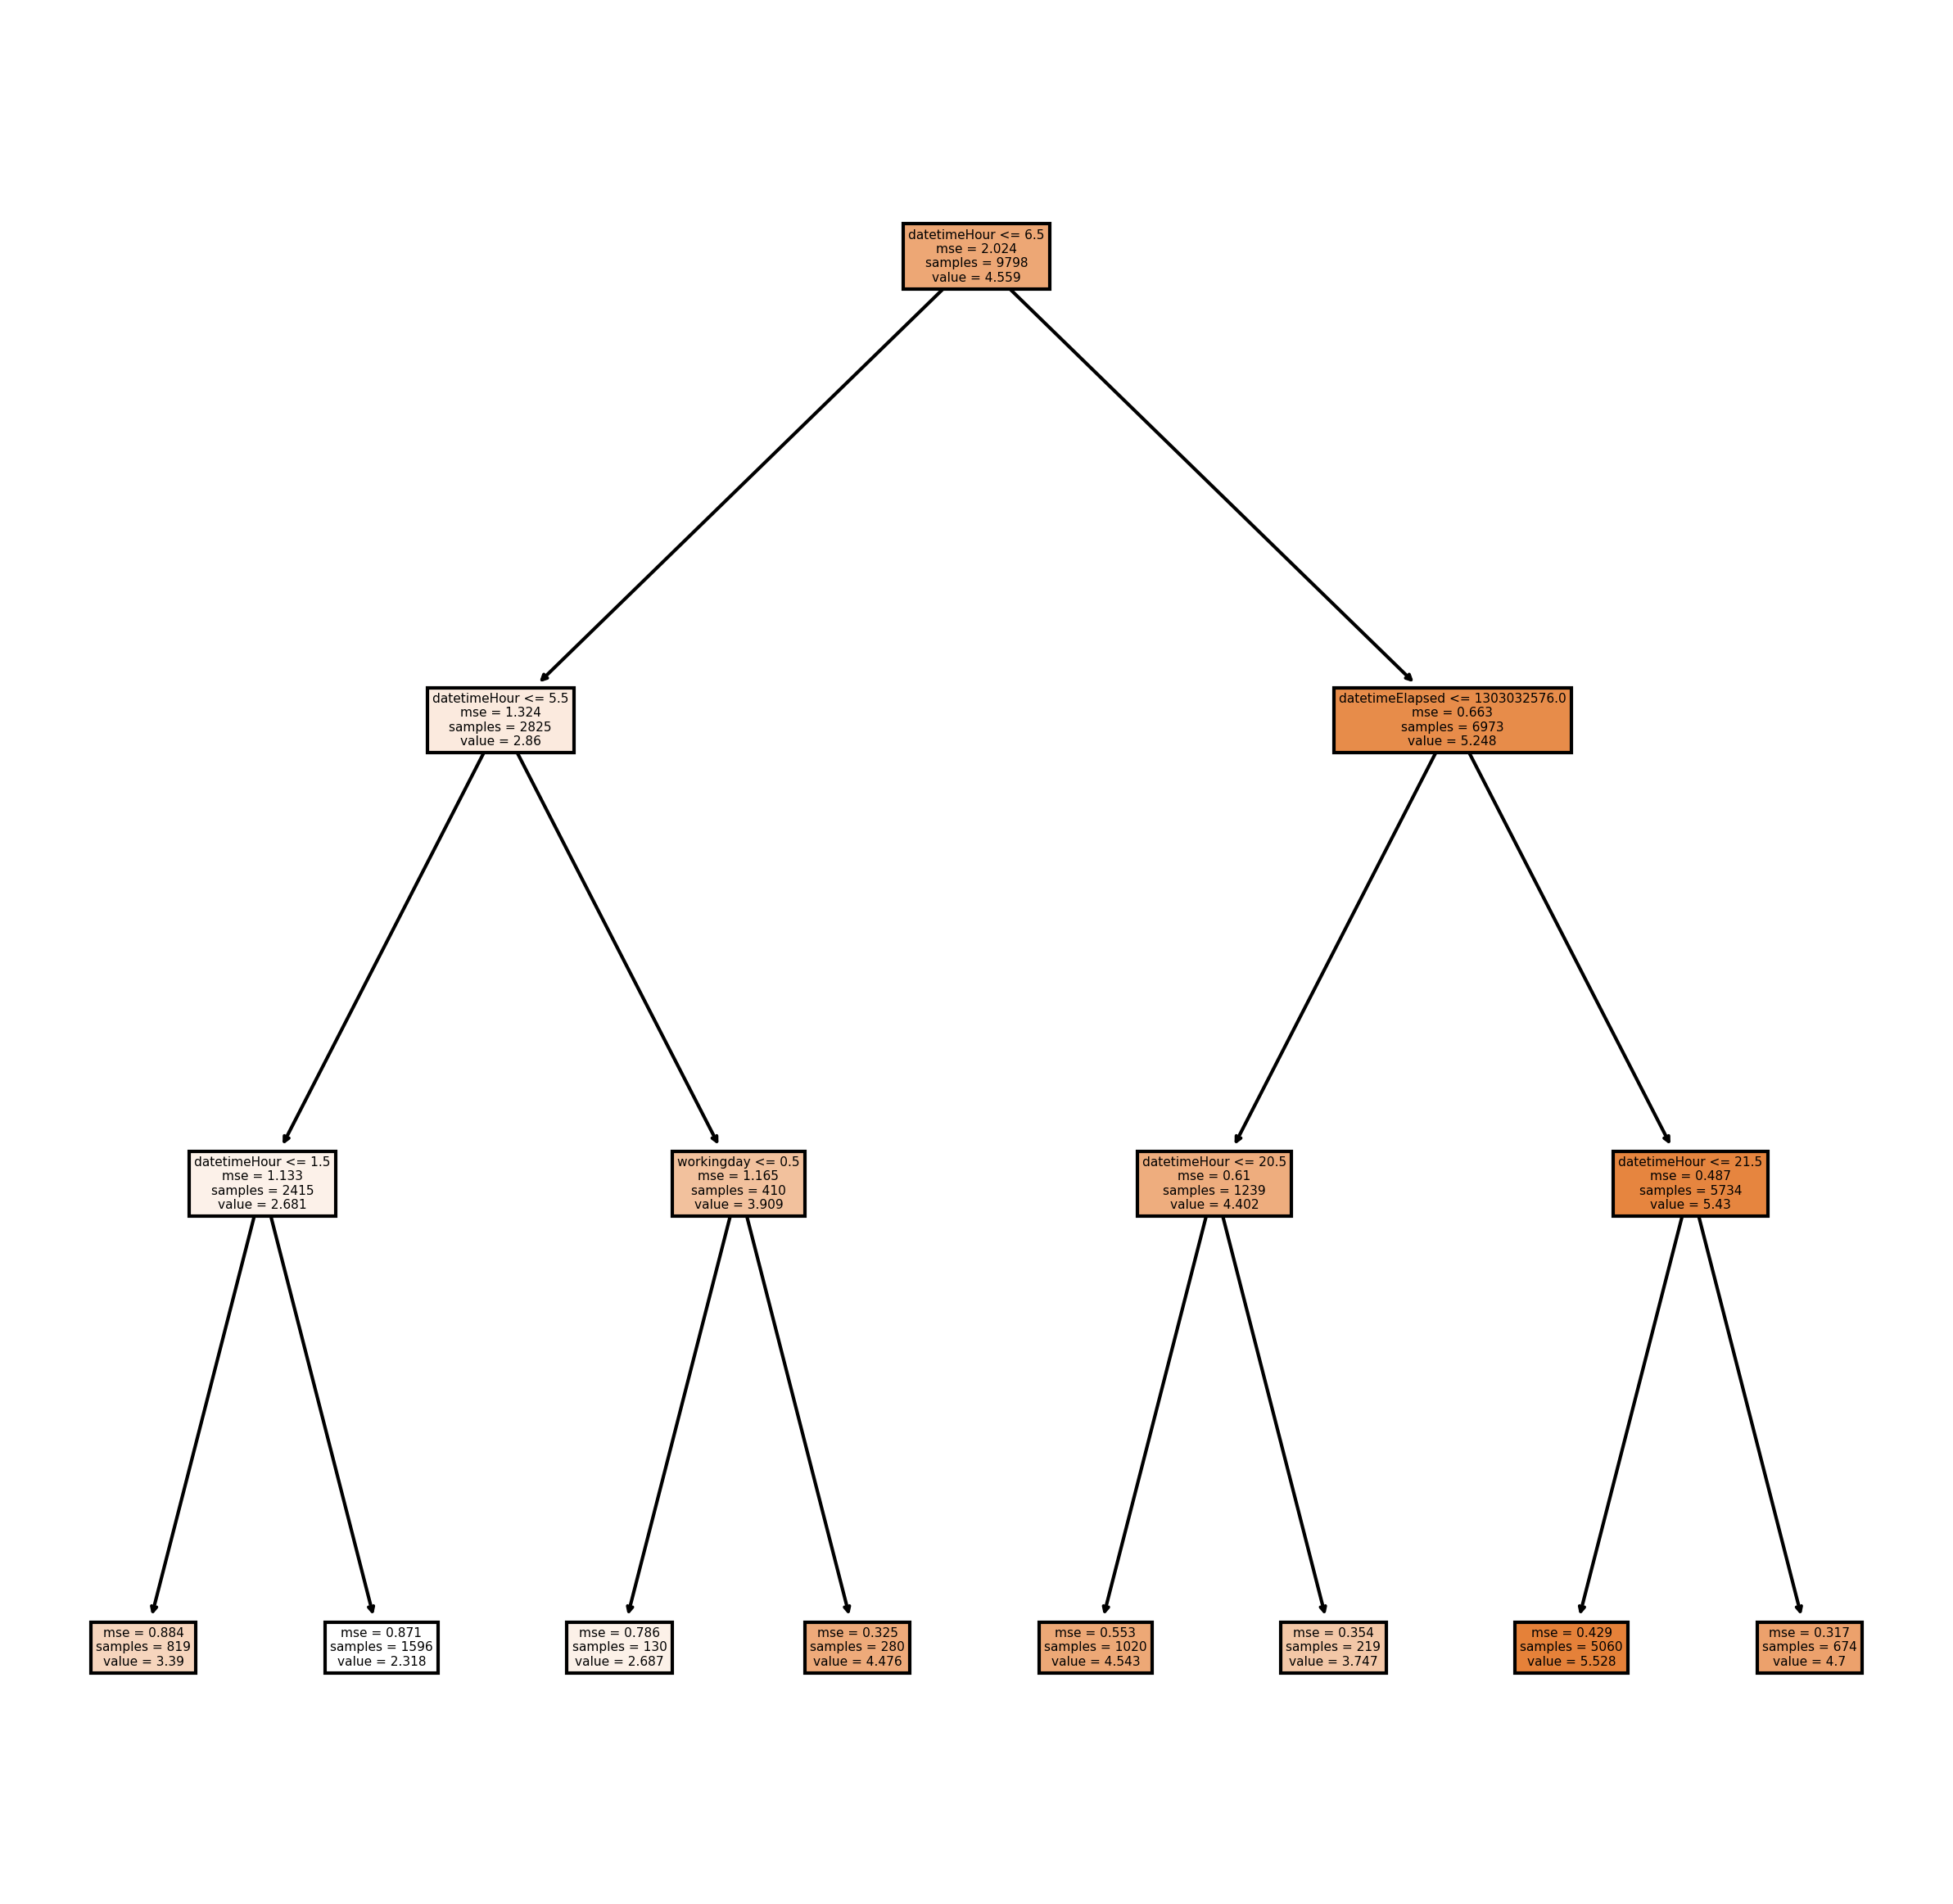

In [48]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(estimator, feature_names=df.columns,filled=True);

# Creating Tree with Maximum Depth

In [49]:
# Max_depth belirtmezsek, model verileri ezberler ve overfittinge sebep olur.
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 1.4537715083515533e-17
RMSE of validation set 0.48756349788944997
R^2 of train set 1.0
R^2 of validation set 0.8706123355527581


# Predictions of Individual Trees

In [50]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.10970493767765992
RMSE of validation set 0.3346755976485111
R^2 of train set 0.9940537387792009
R^2 of validation set 0.9390352776067413


In [51]:
preds = np.array([t.predict(X_valid) for t in m.estimators_]) # tahmin dizilerinin listesi
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([5.91889385, 5.97635091, 6.15060277, 5.96100534, 5.91889385,
        5.94542061, 5.91889385, 5.91889385, 5.91889385, 5.96100534,
        5.91889385, 5.91889385, 6.28785856, 5.97635091, 6.08677473,
        5.96100534, 5.96100534, 5.96100534, 5.91889385, 5.91889385,
        5.96100534, 5.69709349, 5.79605775, 5.96100534, 5.9348942 ,
        5.98645201, 6.13339804, 5.90808294, 5.91889385, 6.15060277,
        5.90808294, 5.96100534, 5.91889385, 5.96100534, 5.96100534,
        5.91889385, 5.91889385, 5.90808294, 6.15060277, 5.96100534,
        5.90263333, 5.94542061, 5.91889385, 5.91889385, 5.91889385,
        5.94542061, 5.94542061, 6.15485809, 5.91889385, 5.91889385,
        5.96100534, 5.97635091, 5.96100534, 5.91889385, 5.94542061,
        5.91889385, 5.91889385, 6.18826412, 5.91889385, 5.91889385,
        5.91889385, 5.94542061, 5.9348942 , 6.08677473, 5.96100534,
        5.95064255, 5.77765232, 5.94542061, 5.91889385, 5.91889385,
        5.91889385, 5.77765232, 6.15485809, 5.96

In [52]:
preds.shape # (number of trees, size of the validation set)

(100, 1088)

Ağaç sayısı eklendikçe belli bir değere kadar R^2 değeri artar. Ancak şekilden de anlaşıldığı gibi 10 dan sonraki artışlar R^2 değerine
büyük bir katkı sağlamamaktadır. Ağaş sayısı yani n_estimator = 5,6,7,8,10 için deneyelim.


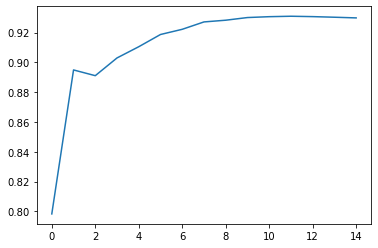

In [53]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(15)]);



In [54]:
m = RandomForestRegressor(n_estimators=5, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.1509926176637201
RMSE of validation set 0.37824825113738136
R^2 of train set 0.9887357297246371
R^2 of validation set 0.9221274560075569


In [55]:
m = RandomForestRegressor(n_estimators=6, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.15265942370368907
RMSE of validation set 0.38952450985084497
R^2 of train set 0.9884856647281269
R^2 of validation set 0.9174152069425406


In [56]:
m = RandomForestRegressor(n_estimators=7, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.1417302650947724
RMSE of validation set 0.3793004937906624
R^2 of train set 0.9900753126879915
R^2 of validation set 0.9216935886362332


In [57]:
m = RandomForestRegressor(n_estimators=8, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.13813864326354972
RMSE of validation set 0.3822747240652158
R^2 of train set 0.9905719471933859
R^2 of validation set 0.9204607168935381


In [58]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.13144260705117175
RMSE of validation set 0.3640125129154843
R^2 of train set 0.9914638121724129
R^2 of validation set 0.9278787689990267


# Out-of-bag (OOB) score


Bazen veri kümeniz küçüktür ve eğitim için doğrulama kümesi ve veri kaybı oluşturmak istemeyiz.
Boostrap uyguladıktan sonra her ağaç, verilerimizin yalnızca alt kümesini görüyor. Böylece, alt kümemizde olmayan verileri belirli ağaçlar için bir doğrulama kümesi olarak kullanabiliriz.

In [59]:
def print_score(m):
    
    print(f"RMSE of train set {rmse(m.predict(X_train), y_train)}")
    print(f"RMSE of validation set {rmse(m.predict(X_valid), y_valid)}")
    print(f"R^2 of train set {m.score(X_train, y_train)}")
    print(f"R^2 of validation set {m.score(X_valid, y_valid)}")
    if hasattr(m, "oob_score_"):
        print(f"OOB score: {m.oob_score_}")

In [60]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m) # 00B Skorumuz val sete göre daha düşük çıktı . Bu overfittinge sebep olabilir. Subsample alarak bu skoru yükseltmeye çalışalım

RMSE of train set 0.13273742956806572
RMSE of validation set 0.3604887625094222
R^2 of train set 0.9912948062697092
R^2 of validation set 0.9292683209829505
OOB score: 0.828595574504178


# Reducing over-fitting


In [61]:
df_s = pd.read_csv(f'{PATH}train.csv', low_memory=False, 
                     parse_dates=["count"])

df_s.drop(['casual','registered'],axis=1,inplace=True) # casual + registered = count olduğundan silinebilir
df_s.datetime = pd.to_datetime(df_s.datetime)

df_s["count"] =  df_s["count"].astype("float")
df_s["count"]  = np.log1p(df_s["count"])

weather=pd.get_dummies(df_raw['weather'],prefix='weather')
df_raw=pd.concat([df_raw,weather],axis=1)

season=pd.get_dummies(df_raw['season'],prefix='season')
df_raw=pd.concat([df_raw,season],axis=1)

add_datepart(df_s, "datetime")

# Subsampling

In [62]:
from sklearn.ensemble import forest

In [63]:
n_valid = int(len(df_s)/10) 
n_trn = len(df_s)-n_valid

df_trn, y_trn = proc_df(df_s, 'count')
X_train, X_valid = split_train_val(df_trn, n_trn)
y_train, y_valid = split_train_val(y_trn, n_trn)

In [64]:
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))

In [65]:
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))

In [66]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.11038660562400207
RMSE of validation set 0.33506051154733585
R^2 of train set 0.9939796132405119
R^2 of validation set 0.9388949646380331


In [67]:
set_rf_samples(1000) # gerekli örneklem büyüklüğünü yolluyoruz.

In [68]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m) # Subsampling yaparak OOB skorumuz yükseldi.

Wall time: 553 ms
RMSE of train set 0.1130668066420952
RMSE of validation set 0.3423620913366174
R^2 of train set 0.9936837125404355
R^2 of validation set 0.9362027664726352
OOB score: 0.9548189392708069


In [69]:
%time X_train = np.array(X_train, dtype=np.float32)

Wall time: 21.7 ms


In [70]:
%time m.fit(X_train, y_train) #

Wall time: 676 ms


RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)

### Using min_sample_leaf

min_samples_leaf hiperparametresini çeşitli değerler vererek güncelleyeyim:

In [71]:
# It will train more quickly because it will be less deep
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)   

Wall time: 497 ms
RMSE of train set 0.1801308426403174
RMSE of validation set 0.3231164014824819
R^2 of train set 0.9839687349276584
R^2 of validation set 0.9431738134996263
OOB score: 0.9544900411804097


In [72]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.21917780085002278
RMSE of validation set 0.3394398573596849
R^2 of train set 0.9762652444053459
R^2 of validation set 0.9372872019810139
OOB score: 0.952794682953612


In [73]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=8, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.2544627389700454
RMSE of validation set 0.340635003373455
R^2 of train set 0.9680081003501638
R^2 of validation set 0.9368448090345942
OOB score: 0.9490920776257158


In [74]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=10, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.27208302018093616
RMSE of validation set 0.3449217540253807
R^2 of train set 0.9634241427873457
R^2 of validation set 0.9352452431098324
OOB score: 0.946236950232638


### Using max_features to Add Randomness to Split

Ağaçlar arasındaki çeşitlilik miktarını artıracaktır. 
Ağaçlarımızın modelimizdeki belirli şeyleri, kalıpları daha iyi öğrenmesini sağlar.
Ayrıca her bölüm için bir sütun örneği kullanacaktır.
Bunu, her bölünmede rastgele seçilecek özelliklerin oranı olan max_features belirleyerek yaparız.

In [75]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)  # We have good scores both validation and OBB score

RMSE of train set 0.20408513081188104
RMSE of validation set 0.3615090740263088
R^2 of train set 0.9794214693434653
R^2 of validation set 0.9288673626991928
OOB score: 0.9470811604812831


# Feature importance

In [76]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [77]:
len(m.feature_importances_) # veri setimizde 22 tane kolon var

22

In [78]:
m.feature_importances_

array([1.90348167e-03, 8.87504005e-04, 2.50306420e-02, 9.09254886e-03,
       4.65378415e-02, 5.57050542e-02, 3.85047594e-02, 6.64241680e-03,
       5.23908530e-03, 4.50415502e-03, 3.84056395e-03, 5.37519980e-03,
       2.63982693e-02, 1.60334086e-02, 0.00000000e+00, 2.26058457e-04,
       0.00000000e+00, 5.37259716e-05, 0.00000000e+00, 4.55593360e-05,
       6.93708010e-01, 6.02717159e-02])

In [79]:
feature_importance = rf_feat_importance(m, df_trn);

In [80]:
feature_importance[:]

,columns,importance
20,datetimeHour,0.693708
21,datetimeElapsed,0.060272
5,atemp,0.055705
4,temp,0.046538
6,humidity,0.038505
12,datetimeDayofweek,0.026398
2,workingday,0.025031
13,datetimeDayofyear,0.016033
3,weather,0.009093
7,windspeed,0.006642


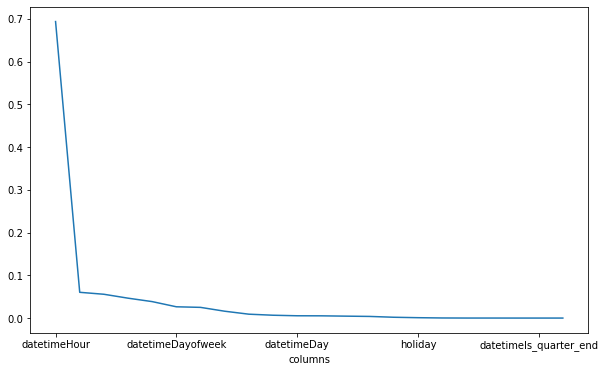

In [81]:
feature_importance.plot('columns', 'importance', figsize=(10,6), legend=False);

In [82]:
def plot_feature_importance(fi): 
    return fi.plot('columns', 'importance', 'barh', figsize=(12,7), legend=False)

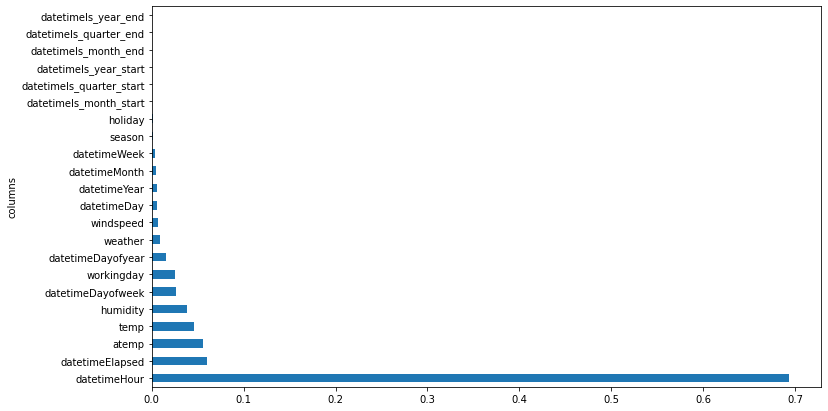

In [83]:
plot_feature_importance(feature_importance[:]);

In [84]:
# En önemli öz nitelikleri seçelim
keep_columns = feature_importance[feature_importance["importance"]>0.005]["columns"]; 
len(keep_columns)

12

In [85]:
keep_columns

20         datetimeHour
21      datetimeElapsed
5                 atemp
4                  temp
6              humidity
12    datetimeDayofweek
2            workingday
13    datetimeDayofyear
3               weather
7             windspeed
11          datetimeDay
8          datetimeYear
Name: columns, dtype: object

In [86]:
df_keep = df_trn[keep_columns].copy()


In [87]:
X_train, X_valid = split_train_val(df_keep, n_trn)
y_train, y_valid = split_train_val(y_trn, n_trn)

In [88]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)


RMSE of train set 0.20345837404849718
RMSE of validation set 0.37223266372332886
R^2 of train set 0.9795476708789805
R^2 of validation set 0.9245846995347855
OOB score: 0.9473948386151126



Bazen gereksiz verilerden kurtulmak, modelinizin yanlış kalıplar bulma riskini azalttığı için 
doğruluğunuzu artırır.

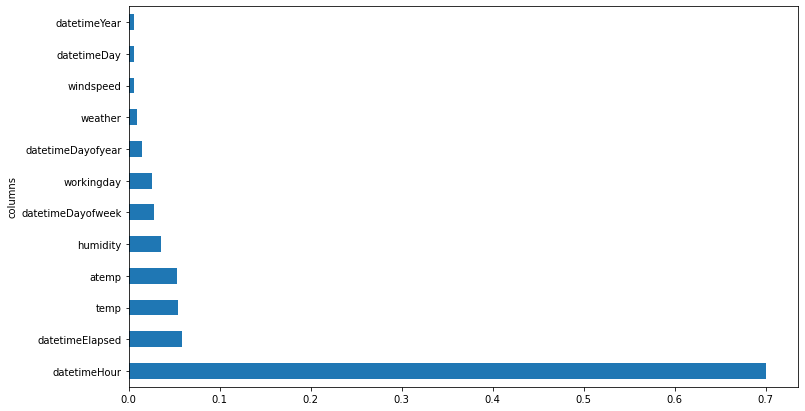

In [89]:
feature_importance = rf_feat_importance(m, df_keep)
plot_feature_importance(feature_importance);

# Removing redundant features


Bazı değişkenlerin benzer anlamları varsa, özelliğin önemini yorumlamak daha zordur ve yanlış kalıp tanıma riskini artırabilir, bu nedenle bunları kaldırmaya ve doğruluğun azaldığını kontrol etmeye çalışacağız.

In [90]:
import scipy
from scipy.cluster import hierarchy as hc
from matplotlib import pyplot as plt

# Dendrogram: Hierarchical Clustering

Spearman korelasyonu(non parametrik yaklaşımlarda terci edilir) her değeri rank ile değiştirir, böylece doğrusal olmayan ilişkileri de yakalayabilir!


In [91]:
scipy.stats.spearmanr(df_keep).correlation[:5]

array([[ 1.        , -0.00481466,  0.13881714,  0.14020581, -0.28240296,
        -0.00291616,  0.00277675, -0.00669108, -0.03258683,  0.1511061 ,
         0.00113275, -0.00423207],
       [-0.00481466,  1.        ,  0.16982556,  0.1737301 ,  0.0297023 ,
        -0.00482249, -0.00348971,  0.50126055,  0.0027157 , -0.07794383,
         0.04415191,  0.86601896],
       [ 0.13881714,  0.16982556,  1.        ,  0.98712847, -0.04202833,
        -0.04480138,  0.02756594,  0.24639054, -0.06193317, -0.03634996,
         0.0129284 ,  0.05355357],
       [ 0.14020581,  0.1737301 ,  0.98712847,  1.        , -0.04685391,
        -0.04072464,  0.03106524,  0.24839719, -0.05791179, -0.00553514,
         0.01953458,  0.05690599],
       [-0.28240296,  0.0297023 , -0.04202833, -0.04685391,  1.        ,
        -0.02598121, -0.01004781,  0.19941171,  0.39949221, -0.32444687,
        -0.01329634, -0.08023229]])

In [92]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr[:5]

array([[ 1.    , -0.0048,  0.1388,  0.1402, -0.2824, -0.0029,  0.0028,
        -0.0067, -0.0326,  0.1511,  0.0011, -0.0042],
       [-0.0048,  1.    ,  0.1698,  0.1737,  0.0297, -0.0048, -0.0035,
         0.5013,  0.0027, -0.0779,  0.0442,  0.866 ],
       [ 0.1388,  0.1698,  1.    ,  0.9871, -0.042 , -0.0448,  0.0276,
         0.2464, -0.0619, -0.0363,  0.0129,  0.0536],
       [ 0.1402,  0.1737,  0.9871,  1.    , -0.0469, -0.0407,  0.0311,
         0.2484, -0.0579, -0.0055,  0.0195,  0.0569],
       [-0.2824,  0.0297, -0.042 , -0.0469,  1.    , -0.026 , -0.01  ,
         0.1994,  0.3995, -0.3244, -0.0133, -0.0802]])

In [93]:
corr_condensed = hc.distance.squareform(1-corr)
corr_condensed[:5]

array([1.0048, 0.8612, 0.8598, 1.2824, 1.0029])

In [94]:
z = hc.linkage(corr_condensed, method='average')
z[:5]

array([[2.00000000e+00, 3.00000000e+00, 1.29000000e-02, 2.00000000e+00],
       [1.00000000e+00, 1.10000000e+01, 1.34000000e-01, 2.00000000e+00],
       [4.00000000e+00, 8.00000000e+00, 6.00500000e-01, 2.00000000e+00],
       [7.00000000e+00, 1.30000000e+01, 7.48650000e-01, 3.00000000e+00],
       [1.20000000e+01, 1.50000000e+01, 8.41866667e-01, 5.00000000e+00]])

In [95]:

Fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()



Benzer özellikleri kaldırmaya çalışacağız ve doğruluğumuzu etkileyip etkilemediğini göreceğiz.

In [96]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
    X_train, X_valid = split_train_val(df_keep, n_trn)

    m.fit(X_train, y_train)
    return m.oob_score_

In [97]:
get_oob(df_keep)

0.9415561325076943


Gereksiz olabileceğini düşündüğündüğümüz featurelar arasında döngü yapmalıyız

In [98]:
for col_name in ('datetimeDayofweek','workingday','datetimeDayofyear','weather','windspeed'):
    print(col_name, get_oob(df_keep.drop(col_name, axis=1)))

datetimeDayofweek 0.9414016196476572
workingday 0.9401954046374975
datetimeDayofyear 0.9424960462357658
weather 0.9412859951132526
windspeed 0.9408794757710919


In [99]:
drop_list = ['datetimeDayofweek', 'datetimeDayofyear' ]
get_oob(df_keep.drop(drop_list, axis=1))

0.9419308356925251

In [100]:
df_keep.drop(drop_list, axis=1, inplace=True)
X_train, X_valid = split_train_val(df_keep, n_trn)

In [101]:
keep_col_name = np.array(df_keep.columns)

In [102]:
df_keep = df_trn[keep_col_name]

In [103]:
X_train, X_valid = split_train_val(df_keep, n_trn)


In [104]:
reset_rf_samples()

In [105]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE of train set 0.21884060381983414
RMSE of validation set 0.4073050169957097
R^2 of train set 0.9763382183350412
R^2 of validation set 0.9097036855446227
OOB score: 0.9414190589522928
